# 24BAD099 - Rithish A

24BAD099 - Rithish A
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  peri

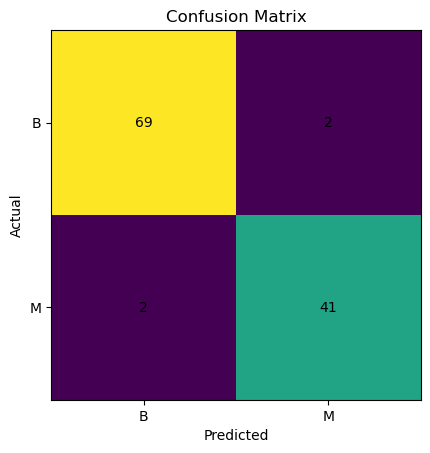

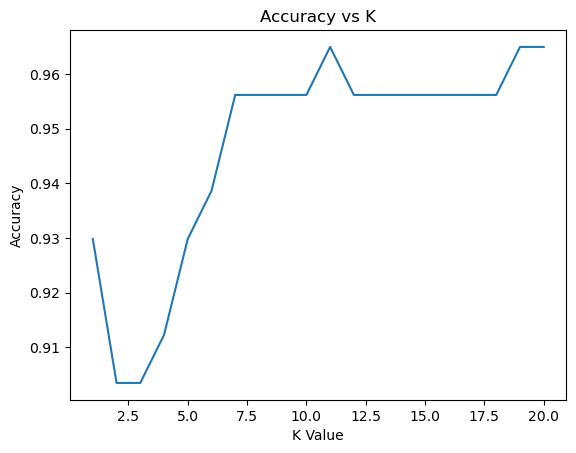

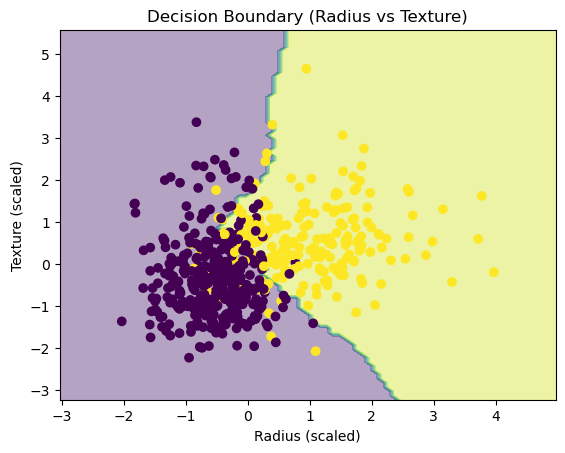

In [1]:
# SCENARIO 1 – KNN Classification on Breast Cancer Dataset

print("24BAD099 - Rithish A")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

df = pd.read_csv("breast-cancer.csv")   # Make sure file is in same directory

print(df.head())
print(df.info())
print(df.isnull().sum())

features = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean']
X = df[features]
y = df['diagnosis']

le = LabelEncoder()
y_encoded = le.fit_transform(y)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_encoded, test_size=0.2, random_state=42
)

k_values = range(1, 21)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred_k = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred_k))

best_k = k_values[np.argmax(accuracies)]
print("Best K:", best_k)

knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

misclassified = np.where(y_test != y_pred)[0]
print("Number of Misclassified Cases:", len(misclassified))

cm = confusion_matrix(y_test, y_pred)

plt.figure()
plt.imshow(cm)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.xticks([0,1], le.classes_)
plt.yticks([0,1], le.classes_)

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha='center', va='center')

plt.show()

plt.figure()
plt.plot(k_values, accuracies)
plt.title("Accuracy vs K")
plt.xlabel("K Value")
plt.ylabel("Accuracy")
plt.show()


X_two = df[['radius_mean', 'texture_mean']]
X_two_scaled = scaler.fit_transform(X_two)

X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X_two_scaled, y_encoded, test_size=0.2, random_state=42
)

knn2 = KNeighborsClassifier(n_neighbors=best_k)
knn2.fit(X_train2, y_train2)

x_min, x_max = X_two_scaled[:, 0].min() - 1, X_two_scaled[:, 0].max() + 1
y_min, y_max = X_two_scaled[:, 1].min() - 1, X_two_scaled[:, 1].max() + 1

xx, yy = np.meshgrid(
    np.arange(x_min, x_max, 0.1),
    np.arange(y_min, y_max, 0.1)
)

Z = knn2.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure()
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X_two_scaled[:, 0], X_two_scaled[:, 1], c=y_encoded)
plt.title("Decision Boundary (Radius vs Texture)")
plt.xlabel("Radius (scaled)")
plt.ylabel("Texture (scaled)")
plt.show()